In [1]:
from pyedhrec import EDHRec

edhrec = EDHRec()

In [21]:
import json

commander = "Wilhelt, the Rotcleaver"

combosJson = edhrec.get_card_combos(commander)

rawCombos = combosJson["container"]["json_dict"]["cardlists"]

print(json.dumps(rawCombos, indent=4))

[
    {
        "cardviews": [
            {
                "name": "Gravecrawler",
                "sanitized": "gravecrawler",
                "sanitized_wo": "gravecrawler",
                "url": "/combos/ub/2438-2452-2577"
            },
            {
                "name": "Rooftop Storm",
                "sanitized": "rooftop-storm",
                "sanitized_wo": "rooftop-storm",
                "url": "/combos/ub/2438-2452-2577"
            },
            {
                "name": "Carrion Feeder",
                "sanitized": "carrion-feeder",
                "sanitized_wo": "carrion-feeder",
                "url": "/combos/ub/2438-2452-2577"
            }
        ],
        "header": "Gravecrawler + Rooftop Storm + Carrion Feeder (17983 decks)",
        "tag": "gravecrawler+rooftopstorm+carrionfeeder(17983decks)",
        "href": "/combos/ub/2438-2452-2577"
    },
    {
        "cardviews": [
            {
                "name": "Gravecrawler",
                "sanitized

In [38]:
import re

combos = []

for rawCombo in rawCombos:
    combos.append(
        {
            'cards': [
                {
                    'slug': card['sanitized'], 
                    'name': card['name']
                } for card in rawCombo['cardviews']
            ],
            'popularity': int(
                re.search(
                    r'\((\d+) decks\)', 
                    rawCombo['header']
                ).group(1)
            )
        }
    )

print(f"Number of Combos: {len(combos)}")
print(combos)

Number of Combos: 100
[{'cards': [{'slug': 'gravecrawler', 'name': 'Gravecrawler'}, {'slug': 'rooftop-storm', 'name': 'Rooftop Storm'}, {'slug': 'carrion-feeder', 'name': 'Carrion Feeder'}], 'popularity': 17983}, {'cards': [{'slug': 'gravecrawler', 'name': 'Gravecrawler'}, {'slug': 'phyrexian-altar', 'name': 'Phyrexian Altar'}], 'popularity': 29467}, {'cards': [{'slug': 'gravecrawler', 'name': 'Gravecrawler'}, {'slug': 'rooftop-storm', 'name': 'Rooftop Storm'}, {'slug': 'ashnods-altar', 'name': "Ashnod's Altar"}], 'popularity': 13352}, {'cards': [{'slug': 'wilhelt-the-rotcleaver', 'name': 'Wilhelt, the Rotcleaver'}, {'slug': 'poppet-stitcher', 'name': 'Poppet Stitcher'}, {'slug': 'carrion-feeder', 'name': 'Carrion Feeder'}], 'popularity': 7224}, {'cards': [{'slug': 'wilhelt-the-rotcleaver', 'name': 'Wilhelt, the Rotcleaver'}, {'slug': 'poppet-stitcher', 'name': 'Poppet Stitcher'}, {'slug': 'ashnods-altar', 'name': "Ashnod's Altar"}], 'popularity': 5309}, {'cards': [{'slug': 'wilhelt-th

In [48]:
uniqueCards = set()
combosPerCard = {}

for combo in combos:
    for card in combo['cards']:
        uniqueCards.add(tuple(card.items()))
        
        if card['slug'] not in combosPerCard:
            combosPerCard[card['slug']] = 0

        combosPerCard[card['slug']] += 1

uniqueCards = [dict(card) for card in uniqueCards]

print(f"Number of Unique Cards Used in Combos: {len(uniqueCards)}")
print(uniqueCards)

Number of Unique Cards Used in Combos: 64
[{'slug': 'gray-merchant-of-asphodel', 'name': 'Gray Merchant of Asphodel'}, {'slug': 'thassas-oracle', 'name': "Thassa's Oracle"}, {'slug': 'poppet-stitcher', 'name': 'Poppet Stitcher'}, {'slug': 'putrid-goblin', 'name': 'Putrid Goblin'}, {'slug': 'funeral-room-awakening-hall', 'name': 'Funeral Room // Awakening Hall'}, {'slug': 'tormod-the-desecrator', 'name': 'Tormod, the Desecrator'}, {'slug': 'thran-vigil', 'name': 'Thran Vigil'}, {'slug': 'yawgmoth-thran-physician', 'name': 'Yawgmoth, Thran Physician'}, {'slug': 'phyrexian-delver', 'name': 'Phyrexian Delver'}, {'slug': 'pitiless-plunderer', 'name': 'Pitiless Plunderer'}, {'slug': 'rooftop-storm', 'name': 'Rooftop Storm'}, {'slug': 'rot-hulk', 'name': 'Rot Hulk'}, {'slug': 'phyrexian-ghoul', 'name': 'Phyrexian Ghoul'}, {'slug': 'grave-titan', 'name': 'Grave Titan'}, {'slug': 'dictate-of-erebos', 'name': 'Dictate of Erebos'}, {'slug': 'nim-deathmantle', 'name': 'Nim Deathmantle'}, {'slug': 

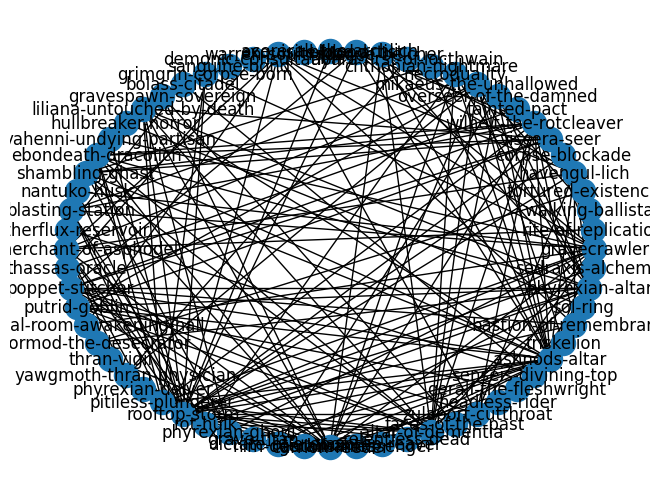

In [49]:
import networkx as nx
graph = nx.Graph()

for card in uniqueCards:
    graph.add_node(card['slug'], name=card['name'], weight=combosPerCard[card['slug']])

for combo in combos:
    for card in combo['cards']:
        for otherCard in combo['cards']:
            if card != otherCard:
                graph.add_edge(card['slug'], otherCard['slug'], weight=combo['popularity'])

nx.draw_shell(graph, with_labels=True)